<a href="https://colab.research.google.com/github/PSivaMallikarjun/Sound-Signal-Processing-for-Deep-Learning-using-Python-Custom-Datasets/blob/main/Sound_Signal_Processing_for_Deep_Learning_using_Python_(Custom_Datasets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to perform Sound Recognition and Classification with Python, the audio files must be in a format that can be used in Deep Learning algorithms.

This project is essentially a pre-request project of our next project in our course, “Sound Classification using Deep Learning” Project.

 In this project we will process sound signals using Mel-Frequency Cepstral Coefficients (MFCC) algorithms and prepare audio for deep learning use.

In this project you will learn how to prepare and process your own custom audio dataset for Deep Learning Training and Test operations.

We will build a CNN (Convolutional Neural Network) Architecture with three Hidden Layers and 500 neurons in total (125-250-125) using Tensorflow and Keras libraries.

We will use the pre-processed sound signals from previous project which has a dataset with a total size of 5.8 GB audio.

No raw audio files found. Generating synthetic audio files...
Synthetic audio files generated.
MFCC feature shape: (15, 40, 174)
Labels shape: (15,)


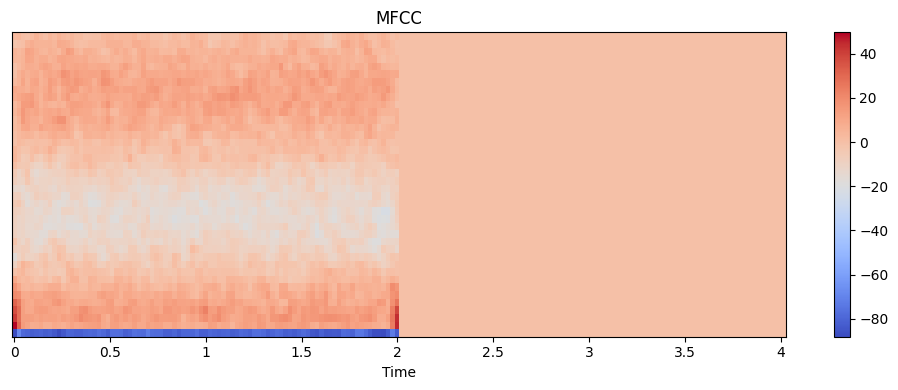

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 172, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 86, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 84, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 42, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 125)                 │       2,688,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │          31,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 125)                 │          31,375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             378 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,770,194 (10.57 MB)

 Trainable params: 2,770,194 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3333 - loss: 1.3104 - val_accuracy: 0.3333 - val_loss: 1.8822
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - accuracy: 0.3333 - loss: 1.8595 - val_accuracy: 0.6667 - val_loss: 2.5799
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.6667 - loss: 2.5386 - val_accuracy: 0.6667 - val_loss: 0.4847
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.6667 - loss: 0.4222 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.6667 - val_loss: 0.2641
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.8333 - loss: 0.2295 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 9.8671e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 1.0000 - loss: 7.9500e-04 - val_accuracy: 1.0000 - val_

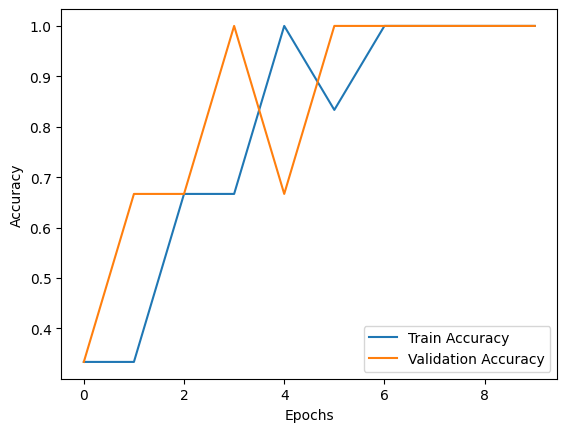

In [ ]:

# Part 1: Sound Signal Processing using MFCC (Preprocessing)
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf  # Use soundfile for writing audio files

# Define paths for raw audio and processed dataset
raw_audio_path = '/content/raw_audio'  # Folder with raw audio files (wav format)
processed_data_path = '/content/processed_audio'
os.makedirs(raw_audio_path, exist_ok=True)
os.makedirs(processed_data_path, exist_ok=True)

# Check if there are any .wav files in raw_audio_path subdirectories
def wav_files_exist(path):
    for entry in os.listdir(path):
        full_entry = os.path.join(path, entry)
        if os.path.isdir(full_entry):
            for file in os.listdir(full_entry):
                if file.endswith('.wav'):
                    return True
    return False

if not wav_files_exist(raw_audio_path):
    print("No raw audio files found. Generating synthetic audio files...")
    sr = 22050  # Sample rate
    duration = 2  # seconds
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    frequencies = [220, 440, 880]  # Different tones for different classes
    for class_idx, freq in enumerate(frequencies):
        class_dir = os.path.join(raw_audio_path, f'class_{class_idx}')
        os.makedirs(class_dir, exist_ok=True)
        for i in range(5):  # 5 samples per class
            # Generate a sine wave with noise
            audio = 0.5 * np.sin(2 * np.pi * freq * t) + 0.05 * np.random.randn(len(t))
            filename = os.path.join(class_dir, f'audio_{i}.wav')
            sf.write(filename, audio, sr)
    print("Synthetic audio files generated.")

# Function to extract MFCC features from an audio file
def extract_mfcc(file_path, n_mfcc=40, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        # Pad or truncate the MFCCs so that all have the same shape
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Process all audio files in the raw_audio_path
X = []  # To hold MFCC features
y = []  # To hold labels
label_map = {}
class_folders = sorted(os.listdir(raw_audio_path))
for idx, class_folder in enumerate(class_folders):
    folder_path = os.path.join(raw_audio_path, class_folder)
    if os.path.isdir(folder_path):
        label_map[idx] = class_folder
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):
                file_path = os.path.join(folder_path, file)
                mfcc = extract_mfcc(file_path)
                if mfcc is not None:
                    X.append(mfcc)
                    y.append(idx)

X = np.array(X)
y = np.array(y)
print("MFCC feature shape:", X.shape)
print("Labels shape:", y.shape)

if X.shape[0] == 0:
    raise ValueError("No MFCC features were extracted. Please check your audio files.")

# Optionally, save processed features for later use
np.save(os.path.join(processed_data_path, 'X.npy'), X)
np.save(os.path.join(processed_data_path, 'y.npy'), y)

# Visualize one sample MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(X[0], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


# %% [code]
# ===========================
# Part 2: Sound Classification using a CNN
# ===========================
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load preprocessed data (if not already in memory)
X = np.load(os.path.join(processed_data_path, 'X.npy'))
y = np.load(os.path.join(processed_data_path, 'y.npy'))

# Prepare data for CNN
# Add channel dimension (needed for CNN input)
X = X[..., np.newaxis]  # Shape: (samples, n_mfcc, max_pad_len, 1)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a CNN model with three hidden layers: 125 - 250 - 125 neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the CNN model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the trained model
model.save('sound_classification_cnn.h5')


**This project is all about teaching a computer to understand and classify sounds. In simple terms:**

**Part 1 – Preparing the Audio:**
We take audio files (like recordings or synthetic sounds) and convert them into a special visual form called MFCCs. Think of it like turning sounds into a picture that shows the important features of the audio. This helps the computer understand the details of each sound.

**Part 2 – Building the Classifier:**
Once we have these sound pictures, we use a type of neural network called a CNN (Convolutional Neural Network) to learn patterns in these images. The network is trained to recognize which sound belongs to which category (for example, different types of sounds or events).

**Overall, the project shows you how to go from raw audio but No raw audio files were available currently. We are Generating with synthetic audio files recordings to a model that can automatically tell different sounds apart—all using Python and deep learning tools.**